###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan.

# Application of Schrödinger equation in micropropulsion

## 1. Introduction
### 1.1 Background for micropropulsion engine
<p style="font-family:Cursive; color:brown;font-size:150%">“ Where did we get that (equation) from? Nowhere. It is not possible to derive it from
anything you know. It came out of the mind of Schrödinger. ”<br/> </p>                                     
<p style='text-align: right'><font color='brown',size = 4>--Richard Feynman [1]</font></p>

Schrödinger equation can be used to explain the dynamics of solition which is highly related to optical fiber communication performance. Besides, this magic equation plays a perfect tool in micropropulsion (powered by energized plama) to represent the dynamics of waves creaed by plasma (neutral combination of ions and electrons) associated with thrust which based on the mechanism of utilizing eletromanetic coil to produce and accelerate plasma.

<img src="https://oak.itl.gwu.edu/user/lyapage/files/plasma/micropropulsion_engine.png" width="400" height="400" />
<p style='text-align: center'>Figure 1.Micropropulsion engine</p>
<img src="https://oak.itl.gwu.edu/user/lyapage/files/plasma/micropropulsion_engine_crosssection.png" width="400" height="400" />
<p style='text-align: center'>Figure 2.Micropropulsion engine cross-section</p>

The Figure 1 shows the part of micropropulsion engine included the plasma injecting chamber and nozzle.The Figure 2 highlihted the plasma chamber as blue part which can be easily distinguished. In this project, nonlinear Schrödinger equation (NLSE) will be treated as 1D and the spatial coordinates correspond to the length of chamber.

### 1.2 Selection of proper NLSE for micropropulsion Engine

Then,it is the time to select the most appropriate schrödinger equation to depict this problem from various types. Original Inhomogeneous higher order nonlinear schrödinger equation (IHNLSE) by **Zhang** [2]:

$$\Psi_x = i( a_1(x)\Psi_{tt} + a_2(x)|\Psi|^2\Psi ) + a_3(x)\Psi_{ttt} + a_4(x)(|\Psi|^2\Psi)_t \\
 a_5(x)\Psi(|\Psi|^2)_t + \Gamma(x)\Psi\qquad\qquad(1)$$
 
For numerical solution, Eq (1) contains a third order time derivatives term which causing the problem of chosing schemes. An interesting thing is that if one let $a_3(x) = a_4(x) = a_5(x) = \Gamma (x) = 0$, this equation will become a perturbed nonlinear schrödinger equation:

$$\Psi_x = i(a_1(x)\Psi_{tt} + a_2(x)|\Psi|^2\Psi)\qquad\qquad(2)$$

Eq (2) is similar to derivative nonlinear schrödinger type 1 solved by **David J. kaup** [3] and type 2 derived by **Hassan** [4]: 

$$i\Psi_t = -\Psi_{xx} + i(\Psi \Psi^2)_x\qquad type~1\\
 i\Psi_t + \dfrac{1}{2}\Psi_{xx}+|\Psi|^2\Psi + i\epsilon\beta_2|\Psi|^2\Psi_x  = 0\qquad type~2\qquad(3)$$

However, for above three equations, they hold one common defficiency: lack of dissipation term which is required for describing working status of plasma injecting chamber.Then,a dissipative NLSE by **Hilmi Demiray** [5] introduced:

$$i\Psi_t + \mu_1\Psi_{xx} + \mu_2|\Psi|^2\Psi + i\mu_3\Psi = 0\qquad\qquad(4)$$

For above equation $\mu_1-dispersion, \mu_2-nonlinearity, \mu_3-dissipation$ when dissipasive are weak which means $\mu_3=0$, then this equation have almost the same expression of **S.M.Hoseini etc** model [6].

## 2 Solving NLSE

### 2.1 Analytical solution  

For Eq (4), **Hilmi Demiray** also derive the exact analytical solution in [5]. Due the complex expression of analytical solution, sympy will be used here to presents the expression clearly.


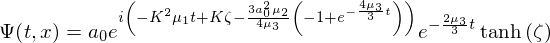

In [1]:
import sympy
from fractions import Fraction
sympy.init_printing()

'''
define three variables actually zata is the intermediate variables depend on t and x
'''
(i, Psi, K, a_0,mu_1,mu_2,mu_3,t,x,zeta) = sympy.symbols('i Psi K a_0 mu_1 mu_2 mu_3 t x zeta')    

eq1 = sympy.Eq(Psi(t,x),a_0*sympy.exp(Fraction(-2,3)*mu_3*t)*sympy.tanh(zeta)\
               *sympy.exp(i*(K*zeta-mu_1*K**2*t\
        -Fraction(3,4)*mu_2/mu_3*a_0**2*(sympy.exp(Fraction(-4,3)*mu_3*t)-1))))

eq2 = sympy.Eq(zeta(t,x),(-mu_2/(2*mu_1))**(Fraction(1,2))*a_0*sympy.exp(-Fraction(2,3)*mu_3\
                    *t)*(x-2*mu_1*K*t))
eq1

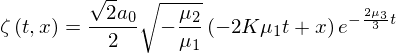

In [2]:
eq2

Above two equations consists of the exact anlytical solution system among these two equations, $a_0,K-constants$

In [3]:
def NLSE_analytical(t,x,mu_1,mu_2,mu_3,a_0,K):
    
    '''
    1. using code: print(eq1) print(eq2) will obtain analytical solution just copy and paste
    them and add prefix:numpy for each operator. 
    
    mu_1: dispersion coefficient
    
    mu_2: nonlinearity coefficient
    
    mu_3: dissipation coefficient
    
    a_0,K - arbitrary constants for solution
    
    '''
    if mu_1*mu_2 > 0: #numpy.sqrt() cannot calculate negative number so make some changes:
                      # ex) numpy.sqrt(-5) = 1j*numpy.sqrt(numpy.abs(5))
    
        zeta= numpy.sqrt(2.0)*a_0*numpy.sqrt(numpy.abs(-mu_2/mu_1))*1j*(-2*K*mu_1*t + x)\
              *numpy.exp(-2*mu_3*t/3)/2
    
    
    else:
        
        zeta= numpy.sqrt(2.0)*a_0*numpy.sqrt(-mu_2/mu_1)*(-2*K*mu_1*t + x)\
              *numpy.exp(-2*mu_3*t/3)/2
    
    
    psi = a_0*numpy.exp(1j*(-K**2*mu_1*t + K*zeta - 3*a_0**2*mu_2\
          *(-1 + numpy.exp(-4*mu_3*t/3))/(4*mu_3)))\
         *numpy.exp(-2*mu_3*t/3)*numpy.tanh(zeta)
    
    
    return psi

In [4]:
import numpy
#Specific impulse for micropropulsion is short, so 5s is an acceptable value.
#According to Professor Michael Keidar's design, length of plasma injecting chamber is 50cm.

tmin = 0.0
tmax = 5.0
nt = 101    #number of steps for time
dt = (tmax-tmin)/(nt-1)

xmin = 0.0
xmax = 0.5
nx = 101    #number of steps for space
dx = (xmax-xmin)/(nx-1)

t = numpy.linspace(tmin,tmax,nt)
x = numpy.linspace(xmin,xmax,nx)
t,x = numpy.meshgrid(t,x)

#mu_1,2,3 coefficients for function 
#a_0,K arbitrary constants for analytical solution 
mu_1 = 1
mu_2 = 1
mu_3 = 1
a_0 = 1
K = 1
#obtain the anlytical solution:
psi_analy = NLSE_analytical(t,x,mu_1,mu_2,mu_3,a_0,K)

In [5]:
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


def plot_3D(t, x, psi):
    
    '''Creates 3D plot for real and imaginary part of psi(t,x)
    
    Parameters:
    ----------
    t: time array
        
    x: space array
    
    psi: wave array
    
    '''
    fig = pyplot.figure(figsize=(16,10), dpi=100)
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(t,x,numpy.real(psi), rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax1.set_title('$Analytical\;solution\;for\;NLSE:real\;part$')
    ax1.set_xlabel('$t$',fontsize = 30)
    ax1.set_ylabel('$x$',fontsize = 30)
    ax1.set_zlabel('$z$',fontsize = 30)
    ax1.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
    
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(t,x,numpy.imag(psi), rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax2.set_title('$Analytical\;solution\;for\;NLSE:imaginary\;part$')
    ax2.set_xlabel('$t$',fontsize = 30)
    ax2.set_ylabel('$x$',fontsize = 30)
    ax2.set_zlabel('$z$',fontsize = 30)

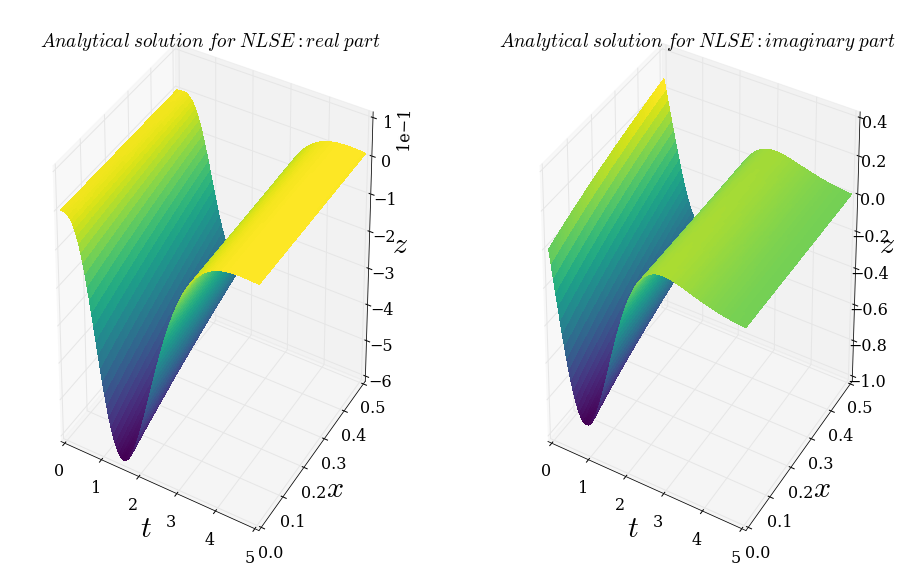

In [6]:
plot_3D(t,x,psi_analy)

### 2.2 Numerical solution
S.M.Hoeini in his paper [6] introduces two implicit schemes--Crank-nicolson scheme and Taha schemes(based on inverse scatterig transform) to calculate this function. 

Crank-nilson scheme recommended here, since this method is popular for second-order parabolic PDE:

$$i(\Psi_i^{n+1} - \Psi_i^{n}) + 
\frac{i\Delta t }{2}\mu_3(\Psi_{i}^{n+1} + \Psi_{i}^{n})
+\frac{\Delta t }{2}\mu_2(\Psi_i^n~{|\Psi_i^{n}|}^2  + \Psi_i^{n+1}~|\Psi_i^{n+1}|^2) 
\\+\dfrac{\Delta t}{2\Delta x^2}\mu_1(\Psi_{i+1}^{n+1} - 2\Psi_{i}^{n+1}+\Psi_{i-1}^{n+1}+\Psi_{i+1}^n - 2\Psi_{i}^n + \Psi_{i-1}^n) = 0$$

This system is unconditionally stable and this is one of the main advantages of implicit method.

Now it is time to provide the Taha scheme:

$$\Psi_i^{n+1} - \Psi_i^n+(\Psi_{i+2}^n+\Psi_{i-2}^n)A^{(4)}-(\Psi_{i+2}^{n+1}+\Psi_{i-2}^{n+1})D^{(4)} + (\Psi_{i+1}^n + \Psi_{i-1}^n)A^{(2)}-(\Psi_{i+1}^{n+1}+\Psi_{i-1}^{n+1})D^{(2)}\\
+\Psi_{i}^{n}A^{(0)} - \Psi_{i}^{n+1}D^{(0)}+\Delta x^2[((\Psi_{i+1}^{n}~\Psi_{i+2}^{n+1}~\Psi_{i+1}^{n+1})+\Psi_{i+1}^{n+1}\Psi_{i}^{n+1}\Psi_{i+1}^{n})...)]$$

It is beyond complicated, I will remove Taha scheme or apply this fancy scheme later. Rearrange terms in Crank scheme put unknown terms on the left whereas place known terms on the right:



$$ i\Psi_i^{n+1} + \frac{i\Delta t}{2}\mu_3\Psi_i^{n+1} +\frac{\Delta t}{2}\mu_2|\Psi_i^{n+1}|^2\Psi_i^{n+1} + \frac{\Delta t}{2\Delta x^2}\mu_1(\Psi_{i+1}^{n+1} - 2\Psi_i^{n+1} - \Psi_{i-1}^{n+1}) = \\ i\Psi_{i}^{n}-\frac{i\Delta t}{2}\mu_3\Psi_{i}^{n} - \frac{\Delta t}{2}\mu_2|\Psi_{i}^{n}|^2\Psi_{i}^{n} -\frac{\Delta t}{2\Delta x^2}\mu_1(\Psi_{i+1}^{n} - 2\Psi_i^{n} + \Psi_{i-1}^n) $$

Taking  condition of inlet and outlet of injecting plasma chamber into account, the left side of this equation satisfy Dirichlet boundary condition: $\Psi(t,0) = 0$ and the right side satisfy Dirichlet condition$\Psi(t,L=0.5) = 0$

solving the equations: $[A][\Psi_i^{n+1}] = [b] + [b]_{b.c} + a_2[~|\Psi_i^n|^2\Psi_i^n~]$, then Coefficient matrix A:

\begin{bmatrix}
  i+a_1-2a_3 & a_3 &\cdots &\cdots &0  \\
  -a_3 & i+a_1-2a_3  & a_3  &\cdots &0  \\
  0 & -a_3 & i+a_1-2a_3  & a_3  &\cdots\\
  \cdots\\
  \cdots\\
  \cdots &\cdots & \cdots &-a_3 & i+a_1-2a_3 \\
\end{bmatrix}

matrix $[\Psi_i^{n+1}]$, and $[b] + [b]_{b.c} + a_2[~|\Psi_i^n|^2\Psi_i^n~]$ should be: 

 \begin{bmatrix} \Psi_1^{n+1}\\ \Psi_2^{n+1} \\ \vdots \\ \Psi_{nx-2}^{n+1} \end{bmatrix}
 
 \begin{bmatrix}a_3\Psi_0^{n+1} -a_3\Psi_0^{n} + (i+2a_3-a_1)\Psi_1^{n} - a_2(|\Psi_1^{n}|^2\Psi_1^n+|\Psi_1^{n+1}|^2\Psi_1^{n+1}) + a_3\Psi_2^n \\ 
 -a_3\Psi_1^n + (i+2a_3-a_1)\Psi_2^{n} - a_2(|\Psi_2^{n}|^2\Psi_2^n+|\Psi_2^{n+1}|^2\Psi_2^{n+1}) - a_3\Psi_3^n \\ 
 \vdots \\ 
 -a_3\Psi_{nx-3}^n + (i+2a_3-a_1)\Psi_{nx-2}^{n} - a_2(|\Psi_{nx-2}^{n}|^2\Psi_{nx-2}^n+|\Psi_{nx-2}^{n+1}|^2\Psi_{nx-2}^{n+1}) - a_3(\Psi_{nx-1}^n+\Psi_{nx-1}^{nx+1})
 \end{bmatrix}

$a_1 = \frac{i\Delta t}{2}\mu_3,~ a_2 = \frac{\Delta t}{2}\mu_2,~a_3 = \frac{\Delta t}{2\Delta x^2}\mu_1$. **Mark J. Ablowitz** in his paper [7] states that it is rational to assume (only in the right side): $\Psi_i^{n} = \Psi_i^{n+1}$. Therefore, the right-hand side becomes known.

In [7]:
import numpy
from scipy.linalg import solve

In [8]:
def Coefficient_Matrix(nx,dt,dx,mu_1,mu_3):
    
    '''
    This is function aims at finding the matrix of coefficient
    
    '''
    
    a1 = 1j*dt/2*mu_3
    a3 = dt/(2*dx**2)*mu_1
        
    #setup the diagonal 
    d = numpy.diag(numpy.ones(nx-2)*(1j - 2*a3+a1))

    #setup upper diagonal
    ud = numpy.diag(numpy.ones(nx-3)*a3,1)

    #setup the lower diagonal
    ld = numpy.diag(numpy.ones(nx-3)*-a3,-1)

    A = d + ud + ld   

    return A

In [9]:
A = Coefficient_Matrix(nx,dt,dx,mu_1,mu_3)
A

array([[-2000.+1.025j,  1000.+0.j   ,     0.+0.j   , ...,     0.+0.j   ,
            0.+0.j   ,     0.+0.j   ],
       [-1000.+0.j   , -2000.+1.025j,  1000.+0.j   , ...,     0.+0.j   ,
            0.+0.j   ,     0.+0.j   ],
       [    0.+0.j   , -1000.+0.j   , -2000.+1.025j, ...,     0.+0.j   ,
            0.+0.j   ,     0.+0.j   ],
       ..., 
       [    0.+0.j   ,     0.+0.j   ,     0.+0.j   , ..., -2000.+1.025j,
         1000.+0.j   ,     0.+0.j   ],
       [    0.+0.j   ,     0.+0.j   ,     0.+0.j   , ..., -1000.+0.j   ,
        -2000.+1.025j,  1000.+0.j   ],
       [    0.+0.j   ,     0.+0.j   ,     0.+0.j   , ...,     0.+0.j   ,
        -1000.+0.j   , -2000.+1.025j]])

In [10]:
def generateRHS(dx,dt,mu_1,mu_2,mu_3,psi):
    
    '''
    compute the right-hand side for NLSE
    ------------------
    psi: wave at current time step
    
    dx,dt: space and time step size
    
    mu_1,2,3: equation coefficients
    
    b: right hand side
    
    |psi|^2 = psi*numpy.conj(psi) due to psi is complex array
    '''
    b = numpy.empty_like(numpy.zeros(nx-2),dtype=complex)
    a1 = 1j*dt/2*mu_3
    a2 = dt/2*mu_2
    a3 = dt/(2*dx**2)*mu_1
    
    b = -a3*psi[:-2] + (1j-a1+2*a3)*psi[1:-1] -\
        2*a2*psi[1:-1]*numpy.conj(psi[1:-1])*psi[1:-1] -a3*psi[2:]
    
    boundary condition:
    b[0] += psi[0]
        
        
    return b

In [87]:
def NLSE_crank_nicolson(psi,A):
     
    '''
    A: coefficient matrix
    
    other parameters explained in above function
    
    psi_t: an array of wave contained time and space 
    '''
    b = numpy.empty_like(numpy.zeros(nx-2),dtype=complex)
    psi_t = numpy.empty_like( numpy.zeros((nt,nx)),dtype = complex)

    for i in range(nt):
        psi_n = psi.copy()
        b = generateRHS(dx,dt,mu_1,mu_2,mu_3,psi_n)

        psi_interior = solve(A,b)
        psi[1:-1] = psi_interior
        psi_t[i,:] = psi
        
    return psi_t

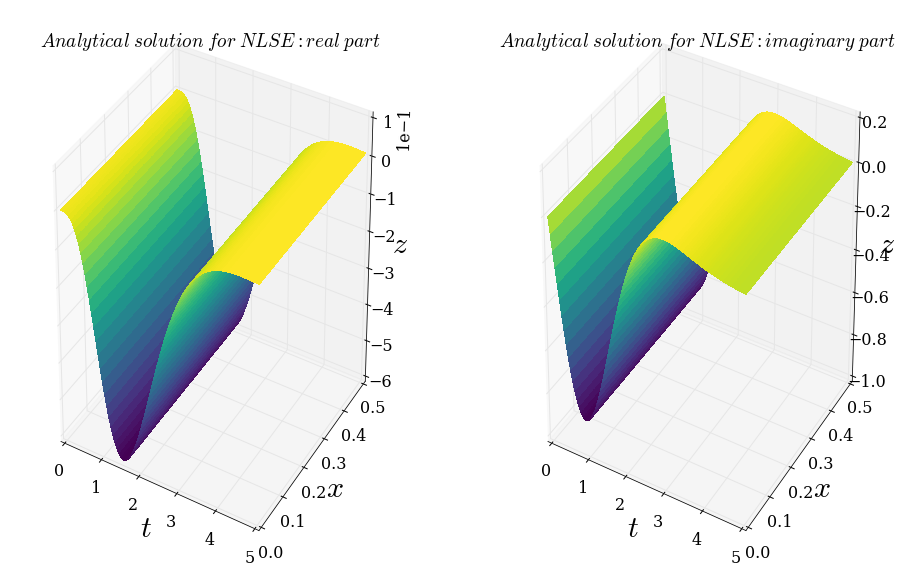

In [89]:
'''In Yaan Yee Choy paper [8], initial wave for NLSE was explained that
    initial condition for psi should equals the derivation in [5]

   Therefore, in numerical solution initial condition of analytical solution will
   be adopted here. 

t,x: time and space already provided in above context
'''
#initial condition of wave:
psi_i = psi_analy[0]
#attain the numerical solution: 
psi_numerical = NLSE_crank_nicolson(psi_i.copy(),A)
plot_3D(t,x,psi_numerical)

In [72]:
def NLSE_FTCS(dt,dx,psi):
    
    '''
    This is Forward time and central space (explicit method)
    
    let me consider the stability: dt/dx**2 >> 1 (not stable)
    so this method should not be applied!!!!!!!!
    '''
    
    psi_n = numpy.empty_like(numpy.zeros((nt,nx)),dtype = complex)
    for i in range(nt):
        psin = psi.copy()
        psi[1:-1] = psin[1:-1] +\
        1j*dt*dx**2*(psin[2:] - 2*psin[1:-1] + psin[0:-2])+\
        psin[1:-1]*numpy.conj(psin[1:-1])*psin[1:-1]-psin[1:-1]

        psi_n[i,:] = psi
    
    return psi_n

### 2.3 Comparison of analytical and numerical solution



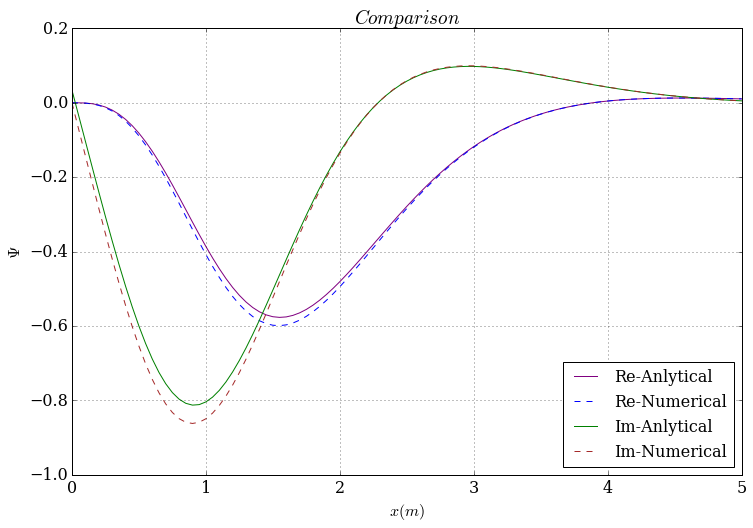

In [103]:
#real part for analytical solution:
psi_analy_r = numpy.real(psi_analy)
#Imaginary part for analytical solution:
psi_analy_i = numpy.imag(psi_analy)

#real part for analytical solution:
psi_numerical_r = numpy.real(psi_numerical)
#real part for analytical solution:
psi_numerical_i = numpy.imag(psi_numerical)

pyplot.figure(figsize = (12,8))
pyplot.grid(True)
pyplot.xlabel('$x(m)$',fontsize = 16)
pyplot.ylabel('$\Psi$',fontsize = 16)
pyplot.plot(x,psi_analy_r[10],ls='-',color='purple')
pyplot.plot(x,psi_numerical_r[10],ls='--',color='blue')

pyplot.plot(x,psi_analy_i[10],ls='-',color='green')
pyplot.plot(x,psi_numerical_i[10],ls='--',color='brown')
pyplot.legend(['Re-Anlytical','Re-Numerical','Im-Anlytical','Im-Numerical'],loc=4,fontsize = 16)
pyplot.title('$Comparison$');

In [57]:
def L2_error(psi_analy,psi_numerical):
    '''
    this function is to find the realtive error between analytical and numerical
    
    psi_analy: exact analytical solution of psi
    
    psi_numerical: numerical solution of psi
    
    e_r: L2 norm of error for real part
    
    e_i: L2 norm of error for imaginary part
    
    '''
    #Finding the real and imaginary part for psi
    psi_analy_r = numpy.real(psi_analy)
    psi_analy_i = numpy.imag(psi_analy)
    psi_numerical_r = numpy.real(psi_numerical)
    psi_numerical_i = numpy.imag(psi_numerical)
    
    e_r = numpy.sqrt(numpy.sum((psi_analy_r-psi_numerical_r)**2)\
                     /numpy.sum(psi_analy_r)**2)

    e_i = numpy.sqrt(numpy.sum((psi_analy_i-psi_numerical_i)**2)\
                     /numpy.sum(psi_analy_i)**2)
    
    return e_r, e_i

In [58]:
e_r,e_i = L2_error(psi_analy[10],psi_numerical[10])
print(e_r)
print(e_i)

0.00586200079894
0.0139251328871


## <p style='text-align: center'>Reference</p>

[1]Section I.11 of Part I of Quantum Theory and Measurement by J.A. Wheeler and W.H. Zurek, eds., Princeton University Press, New Jersey 1983.

[2]Li, Qi, Qiu-yuan Duan, and Jian-bing Zhang. "Exact multisoliton solutions of general nonlinear Schrödinger equation with derivative." The Scientific World Journal 2014 (2014).

[3]Kaup, David J., and Alan C. Newell. "An exact solution for a derivative nonlinear Schrödinger equation." Journal of Mathematical Physics 19.4 (1978): 798-801.

[4]Zedan, Hassan A., and Seham Sh Tantawy. "Exact solutions for a perturbed nonlinear Schrödinger equation by using Bäcklund transformations." Mathematical Methods in the Applied Sciences 32.9 (2009): 1068-1081.

[5]Demiray, Hilmi. "An analytical solution to the dissipative nonlinear Schrödinger equation." Applied mathematics and computation 145.1 (2003): 179-184.

[6]Hoseini, S. M., and Timothy R. Marchant. "The analytical evolution of NLS solitons due to the numerical discretization error." Journal of Physics A: Mathematical and Theoretical 44.50 (2011): 505205.

[7]Taha, Thiab R., and Mark I. Ablowitz. "Analytical and numerical aspects of certain nonlinear evolution equations. II. Numerical, nonlinear Schrödinger equation." Journal of Computational Physics 55.2 (1984): 203-230.